In [2]:
import numpy as np 
import sys
import pdb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

def get_data(x_path, y_path):
    '''
    Args:
        x_path: path to x file
        y_path: path to y file
    Returns:
        x: np array of [NUM_OF_SAMPLES x n]
        y: np array of [NUM_OF_SAMPLES]
    '''
    x = np.load(x_path)
    y = np.load(y_path)

    y = y.astype('float')
    x = x.astype('float')

    #normalize x:
    x = 2*(0.5 - x/255)
    return x, y

def get_metric(y_true, y_pred):
    '''
    Args:
        y_true: np array of [NUM_SAMPLES x r] (one hot) 
                or np array of [NUM_SAMPLES]
        y_pred: np array of [NUM_SAMPLES x r] (one hot) 
                or np array of [NUM_SAMPLES]
                
    '''
    results = classification_report(y_pred, y_true)
    print(results)

if __name__ == '__main__':

    x_train_path = "C:/Users/ANAND/Downloads/ass3_part_b/part b/x_train.npy"
    y_train_path = "C:/Users/ANAND/Downloads/ass3_part_b/part b/y_train.npy"

    X_train, y_train = get_data(x_train_path, y_train_path)

    x_test_path = "C:/Users/ANAND/Downloads/ass3_part_b/part b/x_test.npy"
    y_test_path = "C:/Users/ANAND/Downloads/ass3_part_b/part b/y_test.npy"

    X_test, y_test = get_data(x_test_path, y_test_path)

    #you might need one hot encoded y in part a,b,c,d,e
    label_encoder = OneHotEncoder(sparse_output = False)
    label_encoder.fit(np.expand_dims(y_train, axis = -1))

    y_train_onehot = label_encoder.transform(np.expand_dims(y_train, axis = -1))
    y_test_onehot = label_encoder.transform(np.expand_dims(y_test, axis = -1))

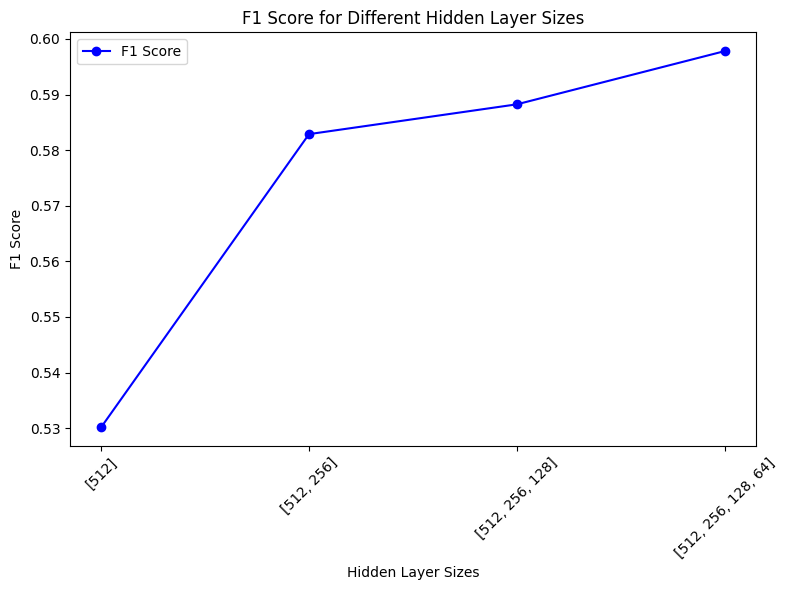

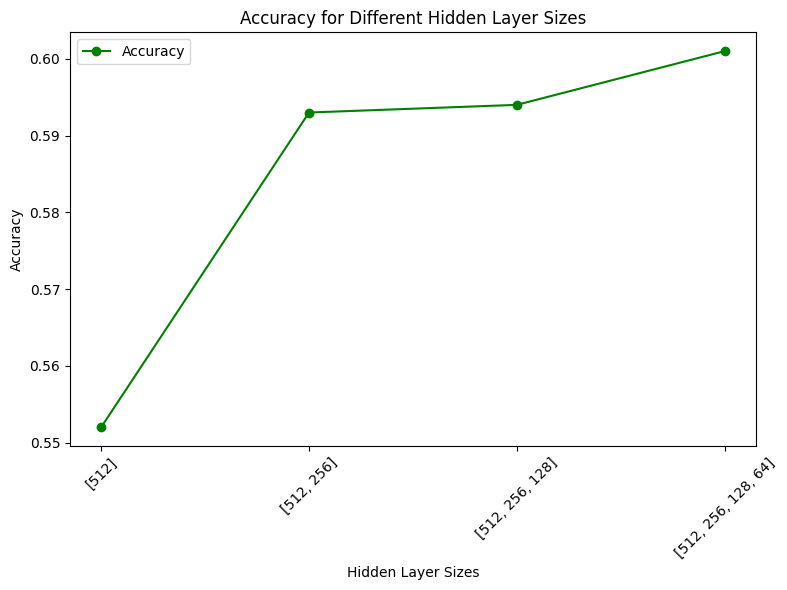

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

def train_and_evaluate(hidden_layer_sizes, X_train, y_train, X_test, y_test, num_epochs=200):
    mlp_classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='sgd',
                                   alpha=0, batch_size=32, learning_rate='invscaling', max_iter=1, random_state=42)
    
    train_loss_history = []
    test_metrics = []
    train_metrics = []
    
    for epoch in range(num_epochs):
        mlp_classifier.partial_fit(X_train, y_train, classes=np.unique(y_train))
        train_loss = mlp_classifier.loss_
        train_loss_history.append(train_loss)

        if len(train_loss_history) > 1 and abs(train_loss_history[-2] - train_loss_history[-1]) < 1e-5:
            print(f"Stopping criterion met at epoch {epoch}. Training Loss: {train_loss:.6f}")
            break
    
    y_pred_test = mlp_classifier.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test,average='weighted')
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    
    train_metrics.append([accuracy_test, f1_test, recall_test, precision_test])
    
    y_pred_train = mlp_classifier.predict(X_train)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    accuracy_train = accuracy_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train,average='weighted')
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    
    train_metrics.append([accuracy_train, f1_train, recall_train, precision_test])
    
    
    return f1, accuracy, train_loss_history, train_metrics, test_metrics

hidden_layer_sizes_list = [[512], [512, 256], [512, 256, 128], [512, 256, 128, 64]]
f1_scores = []
accuracies = []
for hidden_layer_sizes in hidden_layer_sizes_list:
    f1, accuracy, train_loss_history, train_metrics, test_metrics = train_and_evaluate(hidden_layer_sizes, X_train, y_train, X_test, y_test)
    f1_scores.append(f1)
    accuracies.append(accuracy)

# Plotting F1 score
plt.figure(figsize=(8, 6))
plt.plot([str(hidden) for hidden in hidden_layer_sizes_list], f1_scores, marker='o', color='blue', label='F1 Score')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Hidden Layer Sizes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.plot([str(hidden) for hidden in hidden_layer_sizes_list], accuracies, marker='o', color='green', label='Accuracy')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Hidden Layer Sizes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
